# Import

Objetivo: Preparar o ambiente, organizar pastas e carregar o dataset Iris em CSV.

- Configura bibliotecas (pandas, numpy, seaborn, matplotlib).

- Prepara diretórios (se estiver no Colab ou local).

- Cria pastas (orig, data, output).

- Lê o dataset Iris em formato CSV (iris.csv) e imprime as primeiras linhas.

- Ajusta o nome das colunas (capitalizando e trocando espaços por _).

É mais exploratório e de pré-processamento de dados.

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Markdown # Para exibir outputs formatados no Jupyter.

sns.set_theme(style="darkgrid")   # Define estilo visual dos gráficos do seaborn.
pd.set_option('display.max_columns', None)  # Mostra todas as colunas nos DataFrames.

import sys, os, yaml              # sys/os para manipular sistema de arquivos.

DATASET = "Iris"                  # Nome do dataset.
COLAB = 'google.colab' in sys.modules # Verifica se o código está rodando no Google Colab.

DEBUG = False
SEED = 666                        # Define semente de aleatoriedade para reprodutibilidade.

In [ ]:
COLAB = 'google.colab' in sys.modules

if COLAB:                                  # Se rodando no Colab, monta o Google Drive.
  from google.colab import drive
  if not os.path.isdir("/content/gdrive"): # Verifica se o Google Drive já está montado.
    drive.mount("/content/gdrive")         # Monta o Google Drive no Colab.
    d = "/content/gdrive/MyDrive/datasets" # Define o diretório raiz no Google Drive.
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)  # Cria o diretório se não existir.
  ROOT = f"/content/gdrive/MyDrive/datasets/{DATASET.replace(' ','_')}/"
  if not os.path.isdir(ROOT): os.makedirs(ROOT)
else:                                      # Se rodando localmente, define o diretório raiz.
  ROOT = "./"

def makedirs(d):
  if COLAB:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d)  
  else:
    if not os.path.isdir(ROOT+d): os.makedirs(ROOT+d, mode=0o777, exist_ok=True)  # Cria o diretório com permissões 777.

for d in ['orig','data','output']: makedirs(d)

## Load Dataset

In [6]:
df = pd.read_csv(f"{ROOT}/orig/iris.csv")
df.head() # imprimir 5 primeiros registros


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.columns = [c.title().replace(' ', '_') for c in df.columns]   # Renomeia colunas para seguir convenções de nomenclatura.
df.columns

Index(['Sepal_Length_(Cm)', 'Sepal_Width_(Cm)', 'Petal_Length_(Cm)',
       'Petal_Width_(Cm)', 'Target'],
      dtype='object')

## Análise Exploratória

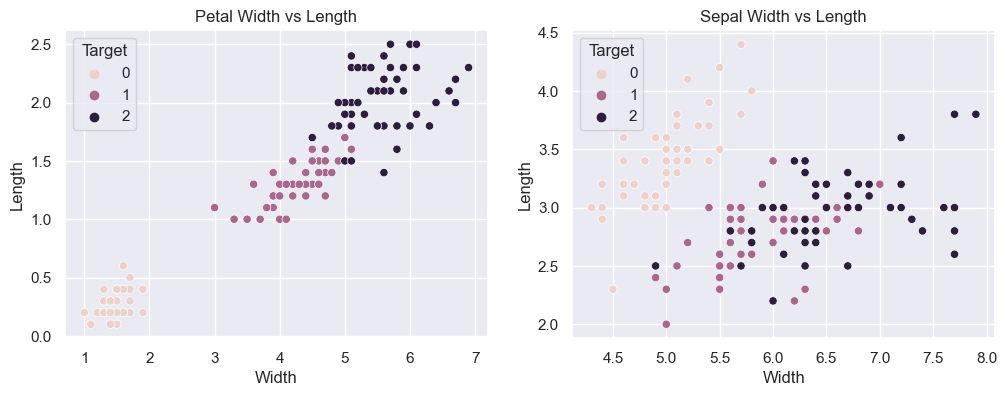

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x = "Petal_Length_(Cm)", y = "Petal_Width_(Cm)", hue = "Target")
plt.title("Petal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x = "Sepal_Length_(Cm)", y = "Sepal_Width_(Cm)", hue = "Target")
plt.title("Sepal Width vs Length")
plt.xlabel("Width")
plt.ylabel("Length")

plt.show()

## Esquerda -> Petal

Eixo X: largura da pétala (Petal Width).

Eixo Y: comprimento da pétala (Petal Length).

Cada ponto representa uma flor.

As cores indicam a classe da flor (Target):

0 = Iris-setosa

1 = Iris-versicolor

2 = Iris-virginica


## Direita → Sepal Width vs Sepal Length

Eixo X: largura da sépala (Sepal Width).

Eixo Y: comprimento da sépala (Sepal Length).

Perceba:

Aqui os pontos das classes se misturam mais.

A separação entre espécies não é tão clara.

Isso mostra que sépalas não são tão eficazes para separar espécies quanto as pétalas.


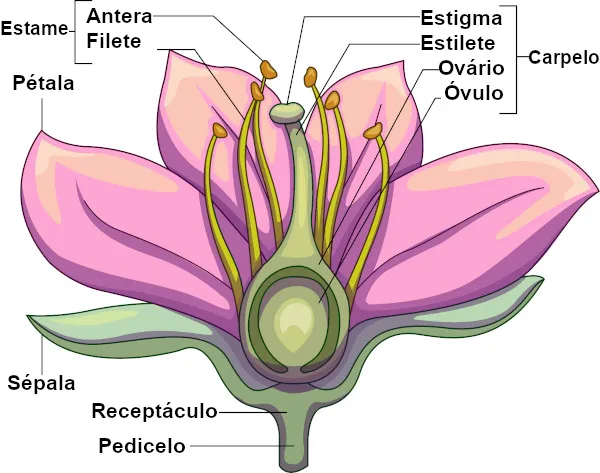

## Save

In [26]:
df.to_pickle(f"{ROOT}/data/iris.pickle")